**BeatifulSoup**  

스트링이 들어오면 돔트리를 구성해 준다!   
정규식 쓰기 힘든사람들을 살려줌

In [1]:
from bs4 import BeautifulSoup

Parser
- lxml
:얘는 아주아주 빠르지만, 웰폼드 일때만 잘기능한다.
잘 안되는 경우 도메인을 파서로 바꿔준다  
어디서나 정규식이 가장 빠르고 정확하긴함

In [3]:
#돔트리 만들기

html = """
<html>
    <head></head>
    <body>
        <div>
            <p>
                <a>go to page</a>
            </p>
        </div>
    </body>
</html>
>"""

In [4]:
#dom 객체 만들기

dom = BeautifulSoup(html, "lxml")#어떤 파서 쓸건지 넣어주삼

In [5]:
dom  #dom이 다큐먼트쪽을 물고 있음

<html>
<head></head>
<body>
<div>
<p>
<a>go to page</a>
</p>
</div>
</body>
</html><html><p>
&gt;</p></html>

In [6]:
dom.html

<html>
<head></head>
<body>
<div>
<p>
<a>go to page</a>
</p>
</div>
</body>
</html>

In [7]:
dom.html.body.div.p.a

<a>go to page</a>

In [8]:
dom.a

<a>go to page</a>

In [35]:
#돔트리 만들기

html = """
<html>
    <head></head>
    <body>
        <div>
            <p>
                <a>go to page1</a>
                <a>go to page2</a>
            </p>
        </div>
    </body>
</html>
>"""

In [36]:
#dom 객체 다시 만들어줌

dom = BeautifulSoup(html, "lxml")

In [37]:
dom.a  #첫번째꺼밖에 못받아옴. 그래서 만들어주는게 id, class야!

<a>go to page1</a>

In [38]:
for i in dom.p.children:
    print(i)



<a>go to page1</a>


<a>go to page2</a>




In [ ]:
#이처럼! 내가 찾고싶은게 특정 지어지지 않으면 부모로 올라가서 보면 된다!
#근데 엄청 큰 사이트들은 부모도 엄청 많아서 이렇게 찾는건 거의 불가능함

In [54]:
#돔트리 만들기

html = """
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red" >go to page1</a>
                <a class="blue">go to page2</a>
            </p>
        </div>
    </body>
</html>
>"""

In [55]:
#dom 객체 다시 만들어줌

dom = BeautifulSoup(html, "lxml")

In [56]:
#id, class 확인하는 법
dom.div["id"]

'result'

In [57]:
dom.a["class"]  #하나만 나오는게 맞나 ?

['red']

In [58]:
dom.p["class"]

['row']

In [72]:
#돔트리 만들기

html = """
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red", id="red", href="https://www.google.com/"">go to page1</a>
                <a class="blue">go to page2</a>
            </p>
        </div>
    </body>
</html>
>"""

In [73]:
#dom 객체 다시 만들어줌

dom = BeautifulSoup(html, "lxml")

In [74]:
type(dom.a["class"])

list

In [75]:
dom.a["href"]

'https://www.google.com/'

In [76]:
for i in dom.p.children:
    print(i)
    print(type(i))



<class 'bs4.element.NavigableString'>
<a class="red" href="https://www.google.com/" id="red">go to page1</a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>
<a class="blue">go to page2</a>
<class 'bs4.element.Tag'>


<class 'bs4.element.NavigableString'>


In [84]:
dom.div["id"].attrs
for _ in [x for x in dom.p.children]:
    print(type(_), _)

AttributeError: 'str' object has no attribute 'attrs'

In [85]:
[x for x in dom.p.children][1].attrs   #string 타입을 list에 담아서 돌림

{'class': ['red'], 'id': 'red', 'href': 'https://www.google.com/'}

In [92]:
dom.find_all('a')

[<a class="red" href="https://www.google.com/" id="red">go to page1</a>,
 <a class="blue">go to page2</a>]

In [100]:
dom.find_all(",attrs{'class':'red'})

SyntaxError: EOL while scanning string literal (<ipython-input-100-1f1ddcc0afd3>, line 1)

In [101]:
#find_all (name, attrs, recursive, string, limit, **kwargs)
#name : 태그이름, string : 내용을 기반으로 가져오는 방법
#list : 최대 몇개까지 가져올건가

In [102]:
dom.find_all({'div','p'})

[<div id="result">
 <p class="row">
 <a class="red" href="https://www.google.com/" id="red">go to page1</a>
 <a class="blue">go to page2</a>
 </p>
 </div>, <p class="row">
 <a class="red" href="https://www.google.com/" id="red">go to page1</a>
 <a class="blue">go to page2</a>
 </p>, <p>
 &gt;</p>]

In [105]:
dom.find_all('a',limit=2)

[<a class="red" href="https://www.google.com/" id="red">go to page1</a>,
 <a class="blue">go to page2</a>]

In [125]:
#돔트리 만들기 #recursive 예제

html = """
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red", id="red", href="https://www.google.com/"">go to page1</a>
                <a class="blue">go to page2</a>
                <div><a></a></div>
            </p>
        </div>
    </body>
</html>
>"""

In [129]:
dom = BeautifulSoup(html, "html.parser")  #parser를 바꿔주젔다. 안바꾸면 리커시브 안해도 p의 자식이 2가나와써


In [130]:
len(dom.p.find_all('a'))

3

In [131]:
len(dom.p.find_all("a",recursive=False))

2

In [132]:
dom.p

<p class="row">
<a "="" ,="" class="red" href="https://www.google.com/" id="red">go to page1</a>
<a class="blue">go to page2</a>
<div><a></a></div>
</p>

In [133]:
dom.div.a

<a "="" ,="" class="red" href="https://www.google.com/" id="red">go to page1</a>

In [137]:
dom.p.div.a.find_parent().name

'div'

In [138]:
dom.p.div.a.find_parents().name #포문돌려서html까지 확인해보자

AttributeError: ResultSet object has no attribute 'name'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [146]:
#돔트리 만들기 #recursive 예제

html = """
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red", id="red", href="https://www.google.com/"">go to page1</a>
                <a class="blue">go to page2</a>
                <div><a></a></div>
                <a class="blue">go to page2</a>
            </p>
        </div>
    </body>
</html>
>"""

In [149]:
dom = BeautifulSoup(html, "html.parser")  #parser를 바꿔주젔다. 안바꾸면 리커시브 안해도 p의 자식이 2가나와써

In [150]:
dom.p.div.a.find_parent().name

'div'

In [153]:
dom.p.div.a.find_parent().find_previous_sibling()

<a class="blue">go to page2</a>

In [1]:
#무슨에런지 뜨도록 예외처리하기
#일부러 에러 발생시켜서 테스트함

import requests
import time
def download(method, url, param=None, data=None, timeout=1, maxretries=3):
    
    try:
        resp = requests.request(method, url, params=param, data=data, headers={"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"})
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600 and maxretries>0:  #500대 에러일시 서버잘못이니까 재시도 메세지 띄워줌
            print(maxretries)
            time.sleep(timeout)
            resp = download(method, url, param, data, timeout, maxretries-1)
        print(e.response.status_code)
        print(e.response.reason)
    return resp
    



In [306]:

url = "http://www.pythonscraping.com/pages/page3.html"
data = {
}
html = download("get", url, data)


In [307]:
html.text

'<html>\n<head>\n<style>\nimg{\n\twidth:75px;\n}\ntable{\n\twidth:50%;\n}\ntd{\n\tmargin:10px;\n\tpadding:10px;\n}\n.wrapper{\n\twidth:800px;\n}\n.excitingNote{\n\tfont-style:italic;\n\tfont-weight:bold;\n}\n</style>\n</head>\n<body>\n<div id="wrapper">\n<img src="../img/gifts/logo.jpg" style="float:left;">\n<h1>Totally Normal Gifts</h1>\n<div id="content">Here is a collection of totally normal, totally reasonable gifts that your friends are sure to love! Our collection is\nhand-curated by well-paid, free-range Tibetan monks.<p>\nWe haven\'t figured out how to make online shopping carts yet, but you can send us a check to:<br>\n123 Main St.<br>\nAbuja, Nigeria\n</br>We will then send your totally amazing gift, pronto! Please include an extra $5.00 for gift wrapping.</div>\n<table id="giftList">\n<tr><th>\nItem Title\n</th><th>\nDescription\n</th><th>\nCost\n</th><th>\nImage\n</th></tr>\n\n<tr id="gift1" class="gift"><td>\nVegetable Basket\n</td><td>\nThis vegetable basket is the perfec

In [308]:
dom = BeautifulSoup(html.content, "lxml")

In [309]:
footer = dom.find("div",{"id":"footer"})

In [310]:
[_.name for _ in footer.find_parents()]

['div', 'body', 'html', '[document]']

In [311]:
[_.name for _ in footer.find_previous_siblings()]

['table', 'div', 'h1', 'img']

In [312]:
[_.name for _ in footer.find_parent().find_all(recursive=False)]

['img', 'h1', 'div', 'table', 'div']

In [313]:
table = footer.find_previous_sibling() 

In [314]:
footer.find_previous_sibling()

<table id="giftList">
<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>
<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gift

In [315]:
# 관계만 가지고 두번째이미지찾기
footer.find_previous_sibling().find_all("tr")[2].find_all("td")[-1].find()

<img src="../img/gifts/img2.jpg"/>

In [316]:
#관계만 가지고 모든 이미지 찾기
footer.find_previous_sibling().find_all("tr")[1].find_all("td")[-1].find()

<img src="../img/gifts/img1.jpg"/>

In [317]:
#관계만 가지고 이미지 주소 찾기
import requests

imgList = [requests.compat.urljoin(html.url,
                        _.find_all("td")[-1].find()["src"])
for _ in footer.find_previous_sibling().find_all("tr")[1:]]

In [318]:
imgList

['http://www.pythonscraping.com/img/gifts/img1.jpg',
 'http://www.pythonscraping.com/img/gifts/img2.jpg',
 'http://www.pythonscraping.com/img/gifts/img3.jpg',
 'http://www.pythonscraping.com/img/gifts/img4.jpg',
 'http://www.pythonscraping.com/img/gifts/img6.jpg']

In [319]:
#byte. write file open  htmlcontent를 확장자 jpg로. 이른은 마지막걸로
with open("html.content","w") as f:
    f.write(html.text)

In [320]:
resp = download("get", imgList[1])  

In [321]:
resp.headers

{'Date': 'Fri, 12 Jul 2019 06:09:19 GMT', 'Server': 'Apache', 'Last-Modified': 'Mon, 04 Aug 2014 00:49:04 GMT', 'ETag': '"412006b-e438-4ffc31b072000"', 'Accept-Ranges': 'bytes', 'Content-Length': '58424', 'Cache-Control': 'max-age=1209600', 'Expires': 'Fri, 26 Jul 2019 06:09:19 GMT', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'image/jpeg'}

In [322]:
resp.headers["Content-Type"].split("/")[0],\
html.headers["Content-Type"].split("/")[0]

('image', 'text')

In [323]:
requests.compat.urlparse(resp.url)

ParseResult(scheme='http', netloc='www.pythonscraping.com', path='/img/gifts/img2.jpg', params='', query='', fragment='')

In [324]:
resp.url.split("/")[-1].split(".")[0]

'img2'

In [325]:
filename = "{0}.{1}".format(resp.url.split("/")[-1].split(".")[0],resp.headers['Content-Type'].split("/")[1])

In [326]:
with open(filename, "wb") as fp:
    fp.write(resp.content)

In [327]:
dom =BeautifulSoup(html.text, "lxml")
[_["src"]for _ in dom.find_all("img")]

['../img/gifts/logo.jpg',
 '../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [332]:
import re
re.findall(r'<td>\s<img src="(.+?)">', html.text) #(구조, 찾는파일)

['../img/gifts/img1.jpg',
 '../img/gifts/img2.jpg',
 '../img/gifts/img3.jpg',
 '../img/gifts/img4.jpg',
 '../img/gifts/img6.jpg']

In [396]:
url = "https://search.naver.com/search.naver"
data = {
    "where": "image",
    "sm": "tab_jum",
    "query": "박보영"
}
html = download("get", url, data)

In [351]:
resp.text

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="박보영 : 네이버 이미지검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'박보영\'의 네이버 이미지검색 결과입니다."> <meta name="description" lang="ko" content="\'박보영\'의 네이버 이미지검색 결과입니다."> <title>박보영 : 네이버 이미지검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_190711.css"> <link rel="stylesheet" type="text/css" hre

In [366]:
import re
re.findall('<img src=".+?" class="_img" alt="(.+?)" onerror=".+?" data-source="(.+?)" data-width="\d+?" data-height="\d+">',resp.text)





[('여기 박보영빠돌이있지않음?? | 카페',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fcafefiles.naver.net%2F20140419_115%2Falsdnr4721_1397918757998zpEC6_JPEG%2F-1042080401.jpg&type=b400'),
 ("박보영 '요정이 눈 앞에'[엑's HD포토] | 포토뉴스",
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F311%2F2019%2F04%2F30%2F0000985275_001_20190430071110015.jpg&type=b400'),
 ('박보영 : 힘쎈여자도봉순 도봉순 | 블로그',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODA3MDRfMTQ4%2FMDAxNTMwNjY3NjY3NjEz.zj9Umgo5orK-9sGr3r5yWQBn9HIYKJY3YVzz4Gzk1bsg.cstJdYVKQm2SFg5M9o0TVOKPaMBM5ud-Rag1IaPZ9Lkg.JPEG.js2y86%2Fqkrqhdud14.jpg&type=b400'),
 ('박보영 사진 모음 #1 (스왑주의) | 블로그',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODEwMTBfMTA1%2FMDAxNTM5MTc2ODM0MDI5.mlRvQ8JGvq5N4tNpgT_wWgPrxlMg6cHXpGDGISJ9iskg.i0sOEaB-ad78ykWXzDiHA33UAqp-g-Mr2ZqPrkD_tZ0g.JPEG.angel000429%2F1539176666436.jpg&type=b400'),
 ("'열정같은소리하고있네' 박보영·정재영, 겨울 패션 화보 공개 | 블로그",
  'https://s

In [367]:
dom = BeautifulSoup(resp.text,"lxml")
[(_["alt"], _["data-source"])
    for _ in dom.find("div",{"class": "photo_grid _box"}).find_all("img")]

[('여기 박보영빠돌이있지않음?? | 카페',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fcafefiles.naver.net%2F20140419_115%2Falsdnr4721_1397918757998zpEC6_JPEG%2F-1042080401.jpg&type=b400'),
 ("박보영 '요정이 눈 앞에'[엑's HD포토] | 포토뉴스",
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F311%2F2019%2F04%2F30%2F0000985275_001_20190430071110015.jpg&type=b400'),
 ('박보영 : 힘쎈여자도봉순 도봉순 | 블로그',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODA3MDRfMTQ4%2FMDAxNTMwNjY3NjY3NjEz.zj9Umgo5orK-9sGr3r5yWQBn9HIYKJY3YVzz4Gzk1bsg.cstJdYVKQm2SFg5M9o0TVOKPaMBM5ud-Rag1IaPZ9Lkg.JPEG.js2y86%2Fqkrqhdud14.jpg&type=b400'),
 ('박보영 사진 모음 #1 (스왑주의) | 블로그',
  'https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAxODEwMTBfMTA1%2FMDAxNTM5MTc2ODM0MDI5.mlRvQ8JGvq5N4tNpgT_wWgPrxlMg6cHXpGDGISJ9iskg.i0sOEaB-ad78ykWXzDiHA33UAqp-g-Mr2ZqPrkD_tZ0g.JPEG.angel000429%2F1539176666436.jpg&type=b400'),
 ("'열정같은소리하고있네' 박보영·정재영, 겨울 패션 화보 공개 | 블로그",
  'https://s

**Selector**
beautiful soup이 편하니?!   
안편하니까 셀렉터 쓸거야~   
정규식은 안하고 css selector에 집중할거임

cssom (css dom)



In [3]:
#돔트리 만들기 #recursive 예제

html = """
<html>
    <head></head>
    <body>
        <div id="result">
            <p class="row">
                <a class="red", id="red", href="https://www.google.com/"">go to page1</a>
                <a class="blue">go to page2</a>
                <div><a class="red"></a></div>
                <a class="blue">go to page2</a>
            </p>
        </div>
    </body>
</html>
>"""




In [21]:
#무슨에런지 뜨도록 예외처리하기
#일부러 에러 발생시켜서 테스트함

import requests
import time
def download(method, url, param=None, data=None, timeout=1, maxretries=3):
    
    try:
        resp = requests.request(method, url, params=param, data=data, headers={"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36"})
        resp.raise_for_status()
        
    except requests.exceptions.HTTPError as e:
        if 500 <= e.response.status_code < 600 and maxretries>0:  #500대 에러일시 서버잘못이니까 재시도 메세지 띄워줌
            print(maxretries)
            time.sleep(timeout)
            resp = download(method, url, param, data, timeout, maxretries-1)
        print(e.response.status_code)
        print(e.response.reason)
    return resp
    



'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><meta content="origin" name="referrer"><title>박보영 - Google 검색</title><script nonce="cypPtRyKTJKYJsqBD1t63g==">(function(){window.google={kEI:\'vtsqXfnoJJ7q8wWYtbaICA\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_vtsqXfnoJJ7q8wWYtbaICA\',kGL:\'KR\'};google.sn=\'web\';google.kHL=\'ko\';})();(function(){google.lc=[];google.li=0;google.getEI=function(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||google.kEI};google.getLEI=function(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b};google.https=function(){return"https:"==window.location.protocol};google.ml=function(){return null};google.time=function(){return(new Date).getTime()};google.log=function(a,b,e,c,g){if(a=google.logUrl(a,b,e,c,g)){b=new Image;var d=google.lc,f=goo
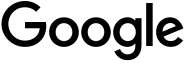
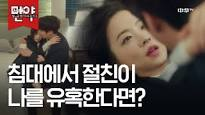
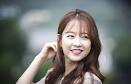
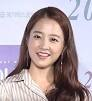
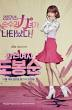
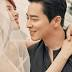

In [22]:
url = "https://www.google.com/search"
data = {
    "q":"박보영"
}

html = download("get", url, data)
html.text

In [445]:
#적게 탐색할수록 좋음
#div class = "rc" 의 a 태그를 .text 
dom = BeautifulSoup(html.text,"lxml")
[(_["href"], _.text)
    for _ in dom.select(".rc > .r a[href^=http]")]  #띄어쓰기 : 자손, 꺽새 : 자식 , #쩜:공백포함

[('https://namu.wiki/w/%EB%B0%95%EB%B3%B4%EC%98%81',
  '박보영 - 나무위키https://namu.wiki/w/박보영'),
 ('https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81',
  '박보영 - 위키백과, 우리 모두의 백과사전https://ko.wikipedia.org/wiki/박보영'),
 ('https://webcache.googleusercontent.com/search?q=cache:gv9t4wBBoSMJ:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581+&cd=12&hl=ko&ct=clnk&gl=kr',
  '저장된\xa0페이지'),
 ('https://ko.wikipedia.org/wiki/%EB%B0%95%EB%B3%B4%EC%98%81%EC%9D%98_%EC%9E%91%ED%92%88_%EB%AA%A9%EB%A1%9D',
  '박보영의 작품 목록 - 위키백과, 우리 모두의 백과사전https://ko.wikipedia.org/wiki/박보영의_작품_목록'),
 ('https://webcache.googleusercontent.com/search?q=cache:VhhxhBJ2kukJ:https://ko.wikipedia.org/wiki/%25EB%25B0%2595%25EB%25B3%25B4%25EC%2598%2581%25EC%259D%2598_%25EC%259E%2591%25ED%2592%2588_%25EB%25AA%25A9%25EB%25A1%259D+&cd=13&hl=ko&ct=clnk&gl=kr',
  '저장된\xa0페이지'),
 ('https://news.joins.com/article/22895953',
  '박보영은 오래 지켜본다. 연애도, 연기 변신도 - 중앙일보https://news.joins.com/article/22895953'),
 ('https:/

dom.select(html)#얘를통해 나오는건 자식이아니라 자손. 자식을 찾고싶다면 ?! 내가 잘 찾아야함 ㅋ
#ID => #어쩌고
#class => .어쩌고
#태그 => 태그
#자손 => 공백
#자식 => >
selector("div") #=> 2
selector("div#result") #=> 1개
selector("#result") #=> 1개
selector(".red")# => 3개
selector("body div")#=> 

In [381]:
#네이벋에서 뉴스로 해ㅗㅃ자

NameError: name 'selector' is not defined

In [435]:
CLASS 다중 상속
<div class="a b c d e"
==> div.a.b.c.d.e
1. 구글 검색결과
2. Naver 검색 결과
3. 다음 검색 결과 파싱 (css selector만 이용)
(개발자도구 X-전적으로 믿지 마시오, 소스보기 O)

다음주 쭌비사항:
    각 조별, 수집하고 싶은 source(URL) 알려주기
    실습ㅂ시간에 해당 URL로 실습할 수 있게

SyntaxError: invalid syntax (<ipython-input-435-3849ee6a3c36>, line 1)